# CS 6140 Machine Learning: Assignment - 4  

## Total Points: 100

## Prof. Ahmad Uzair

# Part- A

## Q1. Univariate anomaly detection (Hypothesis testing) (20 points)
A study was conducted to examine the differences between older and younger adults on perceived life satisfaction. A pilot study was conducted to examine this hypothesis. Ten older adults (over the age of 70) and ten younger adults (between 20 and 30) were giving a life satisfaction test (known to have high reliability and validity). Scores on the measure range from 0 to 60 with high scores indicative of high life satisfaction, low scores indicative of low life satisfaction. The data are presented below. Categorize an adult reporting life satisfaction level as 40. Is she an "Older Adlut" or "Younger Adult". Prove your conclusion with the p-value.  **(20 points)**
 

<table > <th> Older Adults <th> Younger Adult 
    <tr><td> 45              <td> 34
    <tr><td> 38              <td> 22
    <tr><td> 52              <td> 15
    <tr><td> 48              <td> 27
    <tr><td> 25              <td> 37
    <tr><td> 39              <td> 41      
    <tr><td> 51              <td> 24
    <tr><td> 46              <td> 19
    <tr><td> 55              <td> 26
    <tr><td> 46              <td> 36
</table> 

In [4]:
import numpy as np

Older_Adults = [45, 38, 52, 48, 25, 39, 51, 46, 55, 46]

Older_Adults_mean = np.mean(Older_Adults)
sd = np.std(Older_Adults)/np.sqrt(len(Older_Adults))
z = (Older_Adults_mean - 40)/sd
print("The mean of Older Adults:", Older_Adults_mean)
print("Z:", z)

The mean of Older Adults: 44.5
Z: 1.7275776934219595


### Answer: 

The Null and Alrernate hypotheses would be:

    Null Hypothesis (H0): Reporting lift satisfaction level as 40 is "Older Adult"

    Alternate Hypothesis (H1): Reporting lift satisfaction level as 40 is not "Older Adult" (which means it is "Younger Adult").

Let's validate "Older Adult" sample using the p-vlaue method. We will take the threshold (the significance level) of 0.05 to validate this hypothesis. If the calculated p-value is higher than the significance level, we fail to reject the Null Hypothesis; Otherwise, we reject the Null hypothesis.

As the code shown above, the Z-score would be $Z = 1.728$. We will refer the Z-table for finding the probability of the Z-score obtained, and we got the probability of Z-score comes out to be 0.95994.

Next, we need to calculate the p-value: $p = 1 - prob(Z-score) = 1 - 0.95994 = 0.04006$. Since this is a 2-tailed test, we will multiply the p-value by 2: p-value = 0.08012. 

Finally, we wil compare this with the significance level: p-value = 0.08012 and significance level = 0.05. We notice that p-value > significance level. This means that, in this problem statement and the hypothesis, finding a sample means value of 44.5 has a probability of 0.08012 or 8%, which is bigger than the significance level 0.05 or 5%.

Thus, we fail to reject the Null Hypothesis and an adult reporting life satisfaction level as 40 is an "Older Adult".

## Q2. Class imbalance (20 points)
You are given three different datasets with “Y”- target variable (prediction variable), which contains two classes: “rock” and “paper.” Following are the Percentage of the number of samplespresent in Y for each class. 

 (a) Which of the above three datasets will you get a high accuracy just by predicting the majority class, but failing to capture the minority class? why? (Can be one or more) **(5 Points)**
 
 (b) What are possible steps that can be taken to overcome class imbalance? **(10 Points)**
 
 (c) Give any two real-life use cases for class imbalance. **(5 Points)** 
 
 Example- Cancer data The number of people with Cancer are very low when compared to people with Cancer.


<table > <th><th> Dataset1 <tr><td> Rock <td><td> 99%
<tr><td> Paper <td><td> 1% 
</table>   
    
    
<table>
<th><th> Dataset2 <tr><td> Rock <td><td> 50%
<tr><td> Paper <td><td> 50%    
</table>  
    
    
<table>
<th><th> Dataset3 <tr><td> Rock <td><td> 15%
<tr><td> Paper <td><td> 85% <table>    
        

### Answer:
(a) Dataset1 we will get a high accuracy but failing to capture the minority class because there is a huge number different between majority class which is "Rock" and minority class; 99% Rock class and only 1% Paper class. Dataset3 has this problem as well, but it is not as worst as Dataset1.

(b) According to lecture slides, most prior work on imbalance used toy (UCI) datasets which is low dimensionality/ modest imbalance. First, we could use SMOTE which is an oversampling technique where the synthetic samples are generated for the minority class to handle imbalanced data. Second, we could undersampling which is throwing away training data from the majority class until you've an equal number of examples from both classes works well. Besides, we could use bagging which is throwing away majority examples at random adds a stochastic element; it can be mitigated by bagging which is creating an ensemble of classifiers included over balanced samples.

(c) 1) Disease screening-HIV patient: the number of people with HIV are very low when compared to people who don't have HIV. 2) Fraud detection-fruad credit card information: the number of fake credit card information accounted for only 2% of total credit card information. 3) Text classification-spam detection: the number of normal text are huge than spam. 

## Q3. Nerual networks (25 Points)
Consider a neural net for a binary classification which has one hidden layer as shown in the figure below. We use a linear activation function $a(z) = w^Tz$ at hidden units and a sigmoid activation function $a(z) = \frac{1}{(1+e^{−z})}$ at the output unit to learn the function for P (y = 1|x, w) where $x = (x1, x2)$ and $w = (w1, w2,...,w9)$.

(d) What is the output P (y = 1|x, w) from the above neural net? Express it in terms of xi, c and weights $w_i$. What is the final classification boundary? **(10 Points)**
 
 (e) Draw a neural net with no hidden layer which is equivalent to the given neural net and write weights w of this new neural net in terms of $w_i$. **(15 Points)**
 
  (f) Is it true that any multi-layered neural net with linear activation functions at hidden layers can be represented as a neural net without any hidden layer? Explain your answer. **(5 Points)**

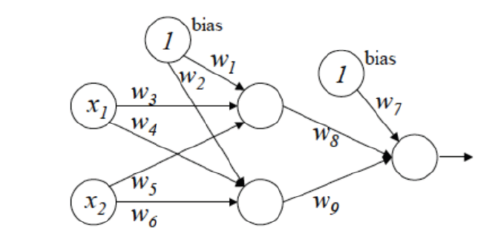

In [2]:
from IPython.display import Image
Image("image.png")

### Answer:
(d) Since we use a sigmoid activation function $a(z) = \frac{1}{(1+e^{−z})}$ at the output unit, the output would be: $\frac{1}{1+e^{-(w_8 * net_{h1} + w_9 * net_{h2} + w_7 * bias)}}$, where bias = 1. If we wamt to get output, the first step should calculate $net_{h1}$ and $net_{h2}$. Hence, we need to see what happened in hidden layer: since we use a linear activation function $a(z) = w^Tz$ at hidden units, we could express $net_{h1} = W^T * (w_3 * x_1 + w_5 * x_2 + bias * w_1)$ and $net_{h2} = W^T * (w_4 * x_1 + w_6 * x_2 + bias * w_2)$, where bias = 1. If we assume that $W^T = c$, then we would have $net_{h1} = c * (w_3 * x_1 + w_5 * x_2 + 1 * w_1)$ and $net_{h2} = c * (w_4 * x_1 + w_6 * x_2 + 1 * w_2)$. If we put $net_{h1}$ and $net_{h2}$ back to the output formula, we would have:
$$\frac{1}{1+e^{-(w_8 * c * (w_3 * x_1 + w_5 * x_2 + 1 * w_1) + w_9 * c * (w_4 * x_1 + w_6 * x_2 + 1 * w_2) + w_7 * 1)}}$$
$$=\frac{1}{1+e^{-(w_8 * c * w_3 * x_1 + w_8 * c * w_5 * x_2 + w_8 * c * w1 + w_9 * c * w_4 * x_1 + w_9 * c * w_6 * x_2 + w_9 * c * w_2 + w_7)}}$$
$$=\frac{1}{1+e^{-((w_8 * c * w_3 + w_9 * c * w_4)x_1 + (w_8 * c * w_5 + w_9 * c * w_6)x_2 + w_8 * c * w_1 + w_9 * c * w_2 + w_7)}}$$
The final classification boundary is: $(w_8 * c * w_3 + w_9 * c * w_4)x_1 + (w_8 * c * w_5 + w_9 * c * w_6)x_2 + w_8 * c * w_1 + w_9 * c * w_2 + w_7 = 0$

(e) If we don't want to have hidden layer but keep same with given neural network, we need to make the new neural network as figure below:

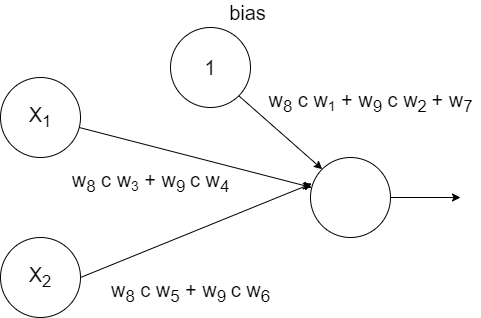

In [3]:
from IPython.display import Image
Image("image1.png")

(f) Yes, and we've also shown in above question. The hidden units using linear activation function could be written as combination of input features.

# Part-B

## Q4. Random forest (35 Points)

Build random forest algorithm from scratch and visualize the output predictions. 

Grading scheme

 a) Implementation of functions to calculate entropy and information gain. **(10 points)**
 
 b) Implementation of Random forest- Randomized sampling and constructing a voting system to select trees. **(10 points)**
 
 c) Fit and predict breast cancer dataset present in sklearn on built random forest **(10 points)**
 
 d) Write a function to visualize the output like shown above in sample implementation - you can use visualize_classifier function or build a new function **(5 points)**

This task consists of two modules 
1) Sample implementation- helps in understanding the need for Random Forest to overcome the disadvantages of Decision Tree.

2) Your implementation- Try and replicate the understanding you have gained from class and sample implementation to build Random forest from scratch(without the use of Sklearn)


### Sample implementation for understanding
#### --------- DO NOT CHANGE 


Below is the implementation of decision tree using sklearn decision tree classifier on make blobs dataset present in sklearn.dataset

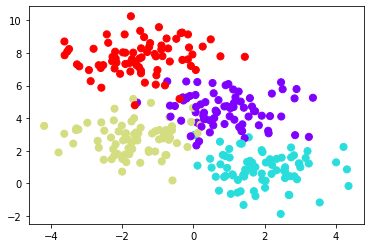

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [2]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3);
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Here you can observe there is an overfit in the predicted output

C:\Users\yijin\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


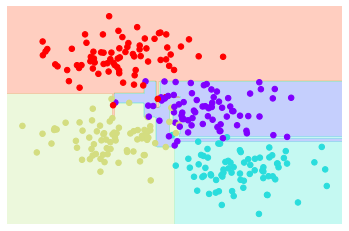

In [4]:
visualize_classifier(DecisionTreeClassifier(), X, y);

To overcome overfit by the decision tree we implement random forest and observe reduction in overfit by marginal a amount.

Multiple naive estimators can be combined to reduce the effect of this overfitting—is what underlies an ensemble method called bagging. Bagging makes use of an ensemble (a grab bag, perhaps) of parallel estimators, each of which learns the function from provided data, and averages the results to find a better classification. An ensemble of randomized decision trees is known as a random forest.

C:\Users\yijin\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


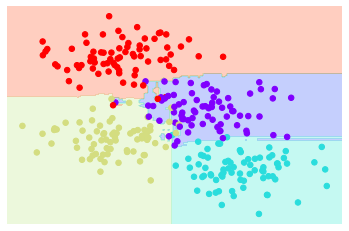

In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);

### ----------

### Your implementation 

- Implement random forest from scratch without the use of sklearn library.
- Below is the skeleton of the code for implementing random forest by taking decision tree and using it to produce randomised sample trees. 
- Note that below skeleton code is just for reference on what functions you will have to implement but not the *only* way. It is optional to use them during the implementation.

Grading scheme

Implementation of entropy and informationgain- **5 points**

Implementation of Random forest- Randomised sampling and costructing voting system to select trees **10 points**

Fit and predict breast cancer dataset present in sklearn on built random forest 
**5 points**

Write a function to visulize the output like shown above in sample implementation - you can use visualize_classifier function or build a new function **5 points**




Decision tree from scratch

In [6]:
import numpy as np
# build a decision tree
class DecisionTree():
    def __init__(self, maxDepth=5, minSplits=10):
        self.max_depth = maxDepth
        self.min_splits = minSplits
        
    def fit(self, f, l):
        self.feature = f
        self.label = l
        self.data = np.column_stack((self.feature, self.label)) # combine two matrix
        self.buildTree()
        #self.printTree(self.root)
    
    # calculate Gini index
    def giniIndex(self, datas, labels):
        num = sum([len(data) for data in datas]) # get the number of samples
        gini = 0.0
        
        for data in datas:
            size = float(len(data))
            score = 0.0
            if size == 0: # just in case divide by 0
                continue
            for label in labels:
                pro = [i[-1] for i in data].count(label) / size
                score += (pro ** 2)
            # weight the score by relative size
            gini += (1.0 - score) * (size / float(num))
        return gini
    
    # to determine when we should stop: in the max depth or min node
    def terminalNode(self, datas):
        out = [data[-1] for data in datas]
        return max(set(out), key=out.count)
    
    # split a dataset based on feature or feature label
    def getSplit(self, index, val, datas):
        left, right = list(), list()
        for data in datas:
            if data[index] <= val:
                left.append(data)
            else:
                right.append(data)
        return left, right
    
    # select the best split for dataset
    def bestSplit(self, datas):
        labels = list(set(data[-1] for data in datas))
        best_index, best_value, best_score, best_datas = float('inf'), float('inf'), float('inf'), None
        for i in range(len(datas[0])-1):
            for data in datas:
                values = self.getSplit(i, data[i], datas)
                gini = self.giniIndex(values, labels)
                if gini < best_score:
                    best_index, best_value, best_score, best_datas = i, data[i], gini, values
        return {'index': best_index, 'value': best_value, 'data': best_datas}
    
    # split node or make terminal
    def splitBranch(self, node, depth):
        left, right = node['data']
        del(node['data'])
        
        # check in case no left or right, then no split
        if not left or not right:
            node['left'] = node['right'] = self.terminalNode(left + right)
            return
        # check max depth
        if depth >= self.max_depth:
            node['left'], node['right'] = self.terminalNode(left), self.terminalNode(right)
            return
        
        # split left child
        if len(left) <= self.min_splits:
            node['left'] = self.terminalNode(left)
        else:
            node['left'] = self.bestSplit(left)
            self.splitBranch(node['left'], depth+1)
        
        # split right child
        if len(right) <= self.min_splits:
            node['right'] = self.terminalNode(right)
        else:
            node['right'] = self.bestSplit(right)
            self.splitBranch(node['right'], depth+1)
    
    # build a decision tree
    def buildTree(self):
        self.root = self.bestSplit(self.data)
        self.splitBranch(self.root, 1)
        return self.root
    
    # make a prediction
    def predict_helper(self, node, data):
        if data[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict_helper(node['left'], data)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict_helper(node['right'], data)
            else:
                return node['right']
    
    # classification algorithm
    def predict(self, testData):
        #self.pred_label = np.array([])
        self.pred_label = np.array([self.predict_helper(self.root, data) for data in testData])
        #for data in testData:
            #self.pred_label = np.append(self.pred_label, self.predict_helper(self.root, data))
        return self.pred_label

Random forest from scratch

In [7]:
import numpy as np 
from collections import Counter
from sklearn.tree import DecisionTreeClassifier


def bootstrap_sample(X, y):
    n = X.shape[0]
    idxs = np.random.choice(n, n, replace=True)
    return X[idxs], y[idxs]

class RandomForest:
    def __init__(self, n_trees=2, maxDepth=5, minSplits=10):
        self.n_trees = n_trees
        self.maxDepth = maxDepth
        self.minSplits = minSplits
        self.trees = list()

    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTree(self.maxDepth, self.minSplits)
            self.X, self.y = bootstrap_sample(X, y)
            tree.fit(self.X, self.y)
            self.trees.append(tree)

    def predict(self, X):
        predict = np.array([tree.predict(X) for tree in self.trees])
        predict = np.swapaxes(predict, 0, 1)
        y_pred = list()
        for pred in predict:
            y_pred.append(Counter(pred).most_common(1)[0][0])
        return np.array(y_pred)

In [8]:
def accuracy(actual, pred):
    return np.sum(actual == pred) / len(actual)

In [9]:
# DO NOT CHANGE
from sklearn import datasets
from sklearn.model_selection import train_test_split
data = datasets.load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [10]:
# modify accoring to your code
clf = RandomForest(n_trees = 3) #call the random forest classifier you have built
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train) 
acc1 = accuracy(y_train, y_pred)
print("Training Accuracy: ", acc1)

y_pred = clf.predict(X_test)
acc2 = accuracy(y_test, y_pred)
print("Testing Acuracy: ", acc2)

Training Accuracy:  0.9648351648351648
Testing Acuracy:  0.956140350877193


Visualize the results predicted by Random Forest and state the observations

C:\Users\yijin\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


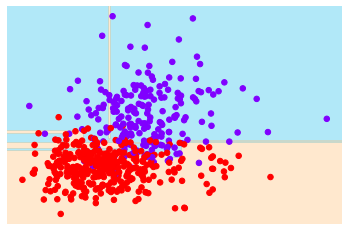

In [19]:
#code
visualize_classifier(RandomForest(n_trees=3), X[:, [1, 2]], y)

Visualize the results predicted of make_blobs by Random Forest

C:\Users\yijin\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


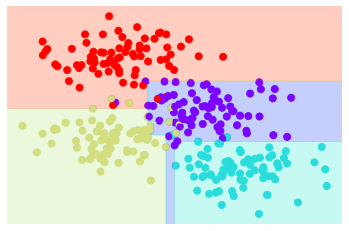

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
;
visualize_classifier(RandomForest(n_trees=3), X, y)